In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [3]:
# It is regression problem.


In [5]:
df=pd.read_csv('stud.csv')

In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
# Taking target variable as math scrore.

In [9]:
X=df.drop(columns='math_score', axis=1)
y=df['math_score']

In [12]:
num_feature=X.select_dtypes(exclude='O').columns
cat_feature=X.select_dtypes(include='O').columns

In [15]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
num_tranformer=StandardScaler()
cat_transform=OneHotEncoder()
preprocessor=ColumnTransformer(
    [ 
        ('OneHotEncoder',cat_transform,cat_feature),
        ('StandardScaler',num_tranformer,num_feature)
    ]
)

In [16]:
X=preprocessor.fit_transform(X)

In [20]:
X.shape

(1000, 19)

In [23]:
# Seperating data set for train and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8, random_state=59)
X_train.shape, y_train.shape

((800, 19), (800,))

In [24]:
#Create an Evaluate Function to give all metrics after model Training
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [25]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3070
- Mean Absolute Error: 4.2665
- R2 Score: 0.8779
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4228
- Mean Absolute Error: 4.1715
- R2 Score: 0.8696


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5501
- Mean Absolute Error: 5.1959
- R2 Score: 0.8140
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.8904
- Mean Absolute Error: 5.3263
- R2 Score: 0.7895


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3072
- Mean Absolute Error: 4.2653
- R2 Score: 0.8779
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4268
- Mean Absolute Error: 4.1743
- R2 Score: 0.8694


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.6471
- Mean Absolute Error: 4.4905
- R2 Score: 0.8618
-----------------------

In [26]:
#Results
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.869639
2,Ridge,0.869443
7,CatBoosting Regressor,0.848827
5,Random Forest Regressor,0.815910
6,XGBRegressor,0.802728
8,AdaBoost Regressor,0.796972
1,Lasso,0.789526
3,K-Neighbors Regressor,0.762664
4,Decision Tree,0.642184


In [28]:
#Linear Regression
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 86.96


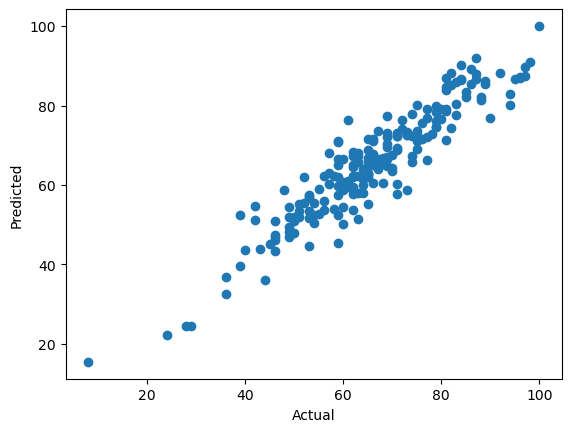

In [30]:
#Plot y_pred and y_test
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

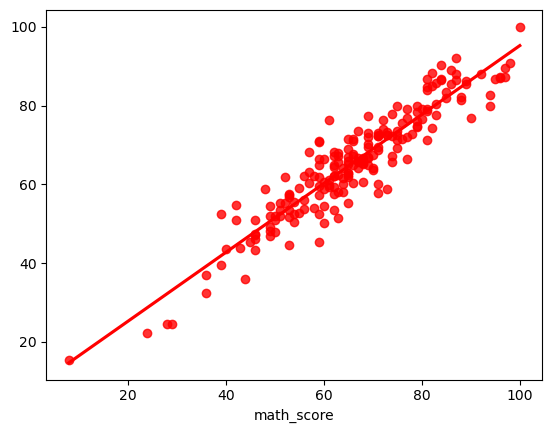

In [31]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [32]:
#Difference between Actual and Predicted Values
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
456,79,79.856268,-0.856268
103,60,50.249237,9.750763
539,97,89.642805,7.357195
49,82,85.066593,-3.066593
694,49,51.853710,-2.853710
...,...,...,...
976,60,60.709011,-0.709011
878,59,70.809975,-11.809975
444,79,78.360773,0.639227
411,84,86.804429,-2.804429
